# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/10poofg-l8DMdtUgGy8mOpra2IHmA9EQC7drmF9AyYHA/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df = pd.read_csv(sheet_url_trf)
df

https://docs.google.com/spreadsheets/d/10poofg-l8DMdtUgGy8mOpra2IHmA9EQC7drmF9AyYHA/export?format=csv&gid=1485085913


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
172,Who Wants to Be a Millionaire?,1.0,NaN,11/1/1999,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,12/1/1994,Space combat simulation,Origin Systems,Electronic Arts
174,Zoo Tycoon,1.0,Zoo Tycoon,10/1/2001,Business simulation,Microsoft,Blue Fang Games
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


# Data Cleaning

In [ ]:
# Drop Duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 10.9+ KB


# < 5% Tidak Signifikan (tdk perlu dihapus) > 5% Perlu dihapus

In [ ]:
2/177*100

1.1299435028248588

In [ ]:
# Check Empty Values
df.isna().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [ ]:
36/175*100

20.57142857142857

# No need to drop empty values, empty values contribute 20% of data

In [ ]:
df['Release']

0      12/1/2017
1      11/1/2011
2       5/1/2012
3      11/1/2006
4       5/1/2011
         ...    
170     3/1/2003
171     9/1/2008
172    11/1/1999
173    12/1/1994
174    10/1/2001
Name: Release, Length: 175, dtype: object

In [ ]:
# Change Datatype
df['Release'] = pd.to_datetime(df['Release'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['Release']

0     2017-12-01
1     2011-11-01
2     2012-05-01
3     2006-11-01
4     2011-05-01
         ...    
170   2003-03-01
171   2008-09-01
172   1999-11-01
173   1994-12-01
174   2001-10-01
Name: Release, Length: 175, dtype: datetime64[ns]

# Export Dataset

In [ ]:
# Export to csv
df.to_csv('games_dataset_cleaned.csv')

In [ ]:
df

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
170,Vietcong,1.0,Vietcong,2003-03-01,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,2008-09-01,MMORPG,Mythic Entertainment,Electronic Arts
172,Who Wants to Be a Millionaire?,1.0,NaN,1999-11-01,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,1994-12-01,Space combat simulation,Origin Systems,Electronic Arts


# Questions
1. Which game is the oldest and the newest games in that dataset?

In [35]:
df[['Name','Release']]

,Name,Release
0,PlayerUnknown's Battlegrounds,2017-12-01
1,Minecraft,2011-11-01
2,Diablo III,2012-05-01
3,Garry's Mod,2006-11-01
4,Terraria,2011-05-01
...,...,...
170,Vietcong,2003-03-01
171,Warhammer Online: Age of Reckoning,2008-09-01
172,Who Wants to Be a Millionaire?,1999-11-01
173,Wing Commander 3: Heart of the Tiger,1994-12-01


In [39]:
# Oldest Games
df[['Name','Release']].sort_values('Release').head(1)

,Name,Release
133,Hydlide,1984-12-01


In [ ]:
# Newest Games
df[['Name','Release']].sort_values('Release', ascending = False).head(1)

,Name,Release
20,Valheim,2021-02-01


2. Which publisher published most of the games?

In [40]:
df[['Name','Publisher']]

,Name,Publisher
0,PlayerUnknown's Battlegrounds,Krafton
1,Minecraft,Mojang Studios
2,Diablo III,Blizzard Entertainment
3,Garry's Mod,Valve
4,Terraria,Re-Logic
...,...,...
170,Vietcong,Gathering of Developers
171,Warhammer Online: Age of Reckoning,Electronic Arts
172,Who Wants to Be a Millionaire?,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,Electronic Arts


In [49]:
agg_publisher = df.groupby('Publisher', as_index = False)['Name'].nunique()
agg_publisher.sort_values('Name', ascending = False)

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


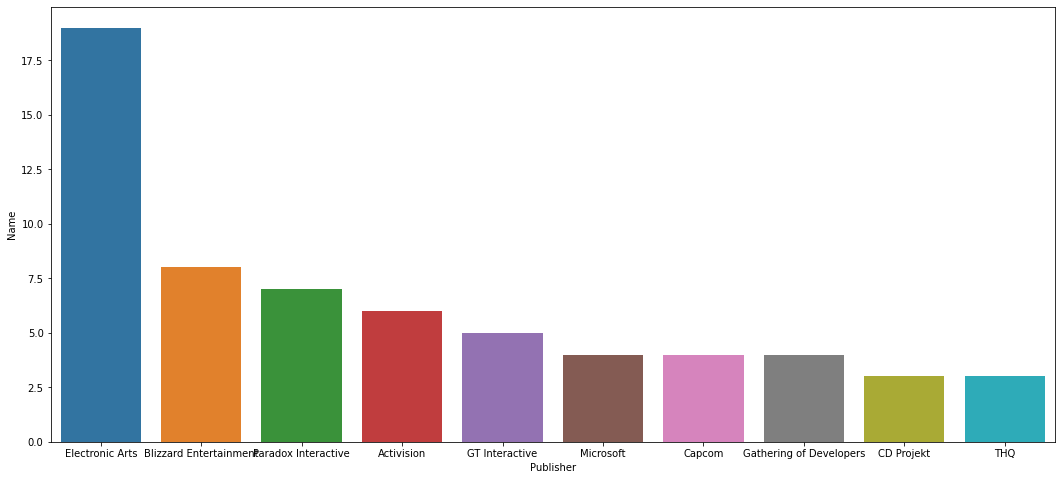

In [ ]:
plt.rcParams["figure.figsize"] = (18,8)
sns.barplot('Publisher', 'Name', data = agg_publisher.sort_values('Name', ascending = False).head(10))

3. Which developer developed most of the games?

In [56]:
agg_dev = df.groupby('Developer', as_index = False)['Name'].nunique()
agg_dev.sort_values('Name', ascending = False)

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4
...,...,...
48,Introversion Software,1
47,Infocom,1
44,Heuristic Park,1
42,Gray Matter Interactive,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


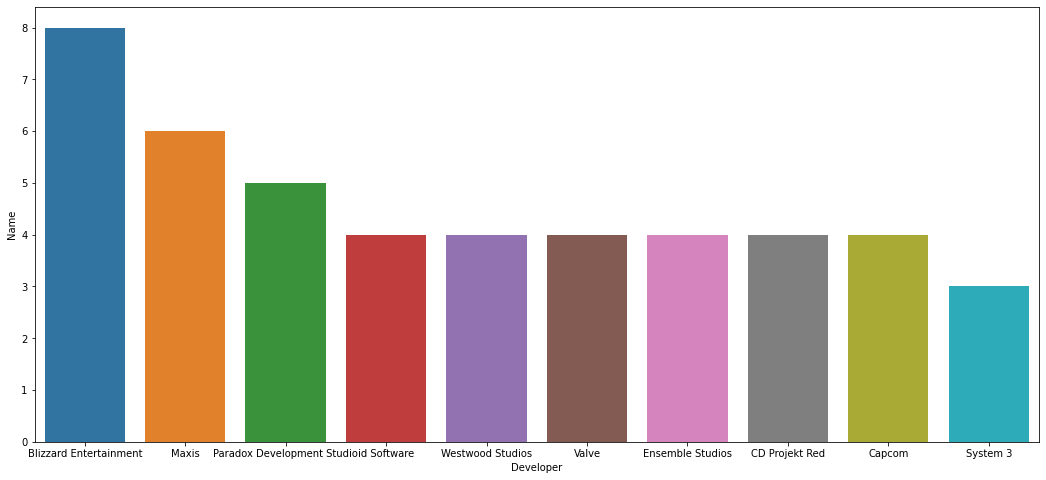

In [ ]:
sns.barplot('Developer','Name', data = agg_dev.sort_values('Name', ascending = False).head(10))

4. Which series is the most sales?

In [61]:
agg_series = df.groupby('Series', as_index = False).agg({'Sales':'sum','Name':'nunique'})
agg_series.sort_values('Sales', ascending = False)

,Series,Sales,Name
47,Minecraft,33.0,1
22,Diablo,26.0,3
75,The Sims,24.0,3
36,Half-Life,21.0,2
85,Warcraft,19.0,3
...,...,...,...
60,RoboCop,1.0,1
46,Microsoft Flight Simulator,1.0,1
58,Railroad Tycoon,1.0,1
56,Psychonauts,1.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


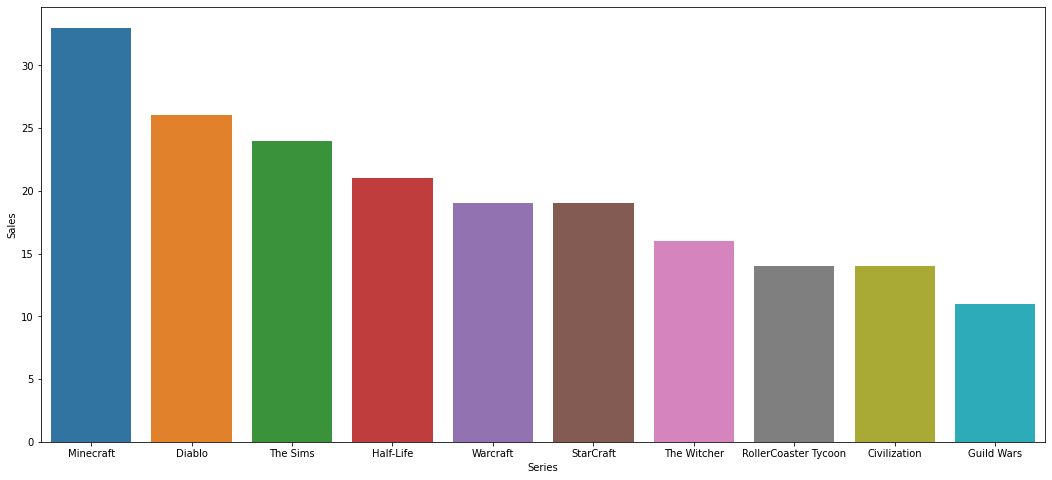

In [ ]:
sns.barplot('Series','Sales', data = agg_series.sort_values('Sales', ascending = False).head(10))

5. Which series have the most games?

In [64]:
agg_series = df.groupby('Series', as_index = False).agg({'Name':'sum','Name':'nunique'})
agg_series.sort_values('Name', ascending = False).head(10)

,Series,Name
13,Command & Conquer,5
68,StarCraft,4
2,Age of Empires,4
12,Civilization,4
20,Dark Souls,3
65,SimCity,3
59,Resident Evil,3
85,Warcraft,3
76,The Witcher,3
75,The Sims,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


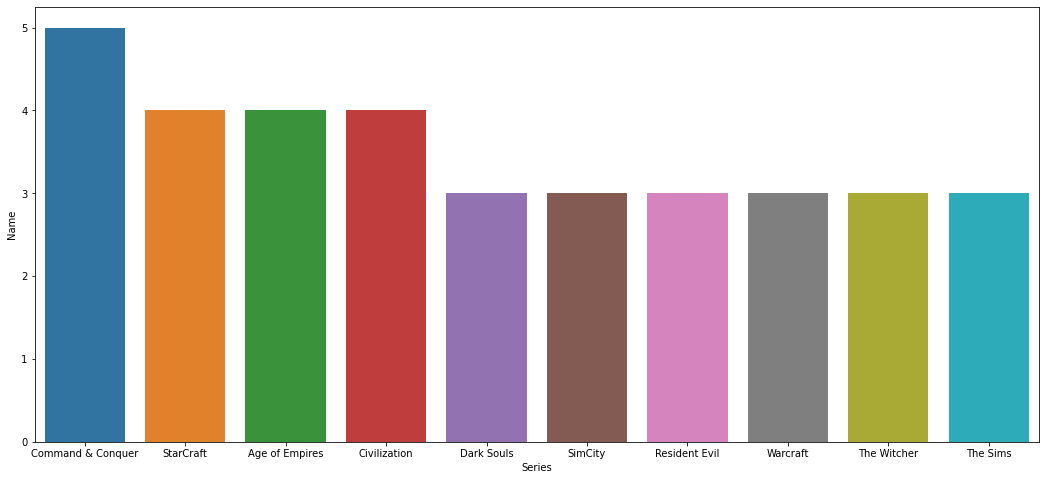

In [ ]:
sns.barplot('Series', 'Name', data = agg_series.sort_values('Name', ascending = False).head(10))